# Plant Village data

### Data Import

Here we import the entire dataset to use in the pre-trained neural networks. The file proceeds in a similar way to 02.1.

In [1]:
#Required packages

import tensorflow as tf
import sys
import json
import math
import keras
import keras.backend as K
import numpy as np
import pickle
import cv2
import pandas as pd
import os

from os import listdir
from sklearn.preprocessing import LabelBinarizer
from numpy import asarray
from numpy import save


from tensorflow.keras.utils import img_to_array
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
default_image_size = tuple((224, 224))

image_size = 0
directory_root = '../Data'
width=224
height=224
depth=3

In [3]:
# function to convert images to array
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size) 
          #  gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [ ]:
#Import
image_list, label_list = [], []

try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)
    for directory in root_dir :
        # remove .DS_Store from list
        if directory == ".DS_Store" :
            root_dir.remove(directory)


    for plant_folder in root_dir :
        plant_disease_folder_list = listdir(f"{directory_root}/{plant_folder}")
        copy=listdir(f"{directory_root}/{plant_folder}")
        plant_list = []
        print(plant_disease_folder_list)
        for disease_folder in copy :
            # remove .DS_Store from list
            print(disease_folder)
            if disease_folder == ".DS_Store" :
                plant_disease_folder_list.remove(disease_folder)
            
                
        for plant_disease_folder in plant_disease_folder_list:
            print(f"[INFO] Processing {plant_disease_folder} ...")
            plant_disease_image_list = listdir(f"{directory_root}/{plant_folder}/{plant_disease_folder}/")
                
            for single_plant_disease_image in plant_disease_image_list :
                if single_plant_disease_image == ".DS_Store" :
                    plant_disease_image_list.remove(single_plant_disease_image)

            for image in plant_disease_image_list:
                image_directory = f"{directory_root}/{plant_folder}/{plant_disease_folder}/{image}"
                if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
                    image_list.append(convert_image_to_array(image_directory))
                    label_list.append(plant_disease_folder)
    print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error : {e}")

[INFO] Loading images ...
['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_healthy', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus']
Pepper__bell___Bacterial_spot
Pepper__bell___healthy
Potato___Early_blight
Potato___healthy
Potato___Late_blight
Tomato_Bacterial_spot
Tomato_Early_blight
Tomato_healthy
Tomato_Late_blight
Tomato_Leaf_Mold
Tomato_Septoria_leaf_spot
Tomato_Spider_mites_Two_spotted_spider_mite
Tomato__Target_Spot
Tomato__Tomato_mosaic_virus
Tomato__Tomato_YellowLeaf__Curl_Virus
[INFO] Processing Pepper__bell___Bacterial_spot ...
[INFO] Processing Pepper__bell___healthy ...
[INFO] Processing Potato___Early_blight ...
[INFO] Processing Potato___healthy ...
[INFO] Processing Potato

In [ ]:
image_size = len(image_list)
print('Number of images: ' + str(image_size))
print('Number of labels: ' + str(len(label_list)))
#lengths match

In [ ]:
image_list[0].shape
#expected size

In [ ]:
#Displaying distribution of labels
from collections import Counter
counts = Counter(label_list)
df = pd.DataFrame.from_dict(counts, orient='index')
df.plot(kind='bar')

In [ ]:
#Binarize labels
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer,open('label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)
print(n_classes)

In [ ]:
print(label_binarizer.classes_)

In [ ]:
image_list = np.array(image_list, dtype=np.float32)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image_list, image_labels, test_size=0.2, random_state = 42) 


In [ ]:
print(len(x_train))
print(len(x_test))

../Data/PlantVillage/Pepper__bell___Bacterial_spot/0022d6b7-d47c-4ee2-ae9a-392a53f48647___JR_B.Spot 8964.JPG
../Data/PlantVillage/Pepper__bell___Bacterial_spot/006adb74-934f-448f-a14f-62181742127b___JR_B.Spot 3395.JPG
../Data/PlantVillage/Pepper__bell___Bacterial_spot/00f2e69a-1e56-412d-8a79-fdce794a17e4___JR_B.Spot 3132.JPG
../Data/PlantVillage/Pepper__bell___Bacterial_spot/01613cd0-d3cd-4e96-945c-a312002037bf___JR_B.Spot 3262.JPG
../Data/PlantVillage/Pepper__bell___Bacterial_spot/0169b9ac-07b9-4be1-8b85-da94481f05a4___NREC_B.Spot 9169.JPG
../Data/PlantVillage/Pepper__bell___healthy/00100ffa-095e-4881-aebf-61fe5af7226e___JR_HL 7886.JPG
../Data/PlantVillage/Pepper__bell___healthy/00208a93-7687-4e8c-b79e-3138687e0f38___JR_HL 7955.JPG
../Data/PlantVillage/Pepper__bell___healthy/002f87b7-e1a5-49e5-a422-bb423630ded5___JR_HL 8068.JPG
../Data/PlantVillage/Pepper__bell___healthy/00726ad4-2569-46ce-9d4e-dbf82b14bd94___JR_HL 8686.JPG
../Data/PlantVillage/Pepper__bell___healthy/0119205b-cfac-432

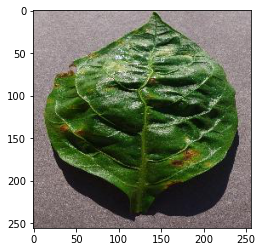

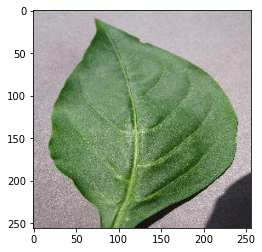

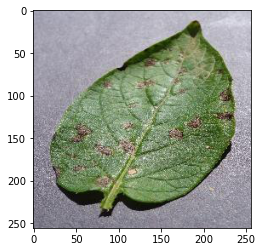

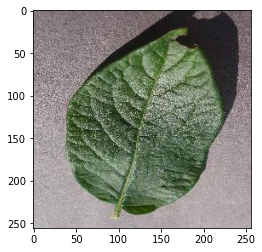

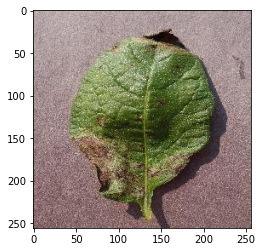

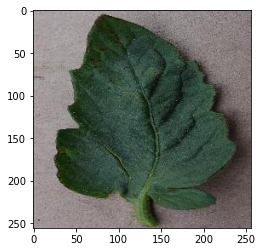

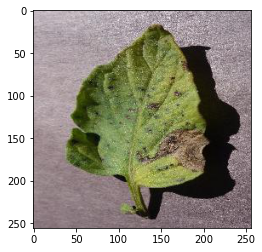

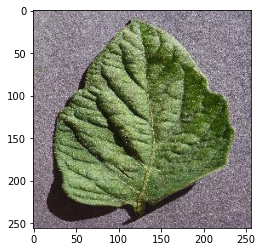

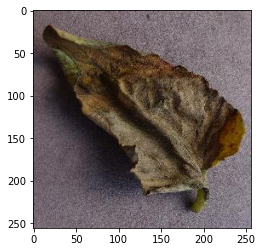

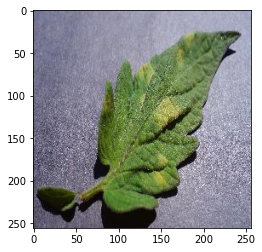

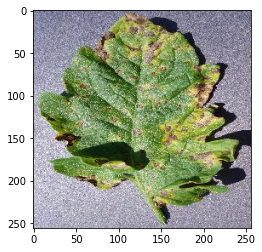

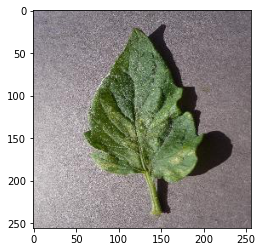

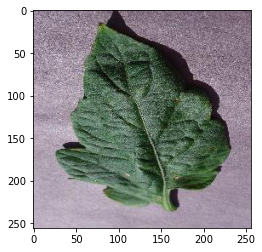

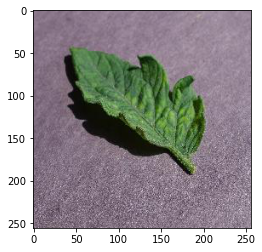

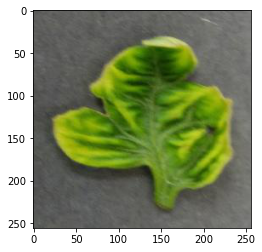

In [7]:
# Viewing some images

import matplotlib.image as mpimg

directory = os.listdir('../Data/PlantVillage')
for each in directory:
    plt.figure()
    currentFolder = '../Data/PlantVillage/' + each
    for i, file in enumerate(os.listdir(currentFolder)[0:5]):
        fullpath = currentFolder + "/" + file
        print(fullpath)
        img=mpimg.imread(fullpath)
       # plt.subplot(2, 3, i)
        plt.imshow(img)